In [1]:
%pip install -q "monai[gdown, nibabel, tqdm]"

Note: you may need to restart the kernel to use updated packages.


In [14]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
from sklearn.metrics import classification_report

from monai.apps import download_and_extract

from monai.metrics import ROCAUCMetric
from monai.networks.nets import DenseNet121
from monai.transforms import (
    Activations,
    EnsureChannelFirst,
    AsDiscrete,
    Compose,
    LoadImage,
    RandFlip,
    RandRotate,
    RandAxisFlip,
    RandZoom,
    ScaleIntensity,
    ToTensor,
    Spacing,
    Rotate90,
    Flip,
    Resize,
)
from monai.data import Dataset, DataLoader
from monai.utils import set_determinism
from monai.visualize import matshow3d
from monai.config import print_config

print_config()

MONAI version: 1.4.dev2417
Numpy version: 1.26.4
Pytorch version: 2.2.2+cpu
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 512154add7a0d66f50a2689006c9e91c7aceeace
MONAI __file__: c:\Users\<username>\AppData\Local\Programs\Python\Python312\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.2.1
scikit-image version: 0.23.2
scipy version: 1.13.0
Pillow version: 10.3.0
Tensorboard version: NOT INSTALLED or UNKNOWN VERSION.
gdown version: 4.7.3
TorchVision version: NOT INSTALLED or UNKNOWN VERSION.
tqdm version: 4.66.2
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.8
pandas version: 2.2.2
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml

Image size: (1860, 2316)
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.21767.127.0.0.1.1251311760.0.0.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.5.3
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_353'
(0002, 0016) Source Application Entity Title     AE: 'SYNARC_IMDA'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 896
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3

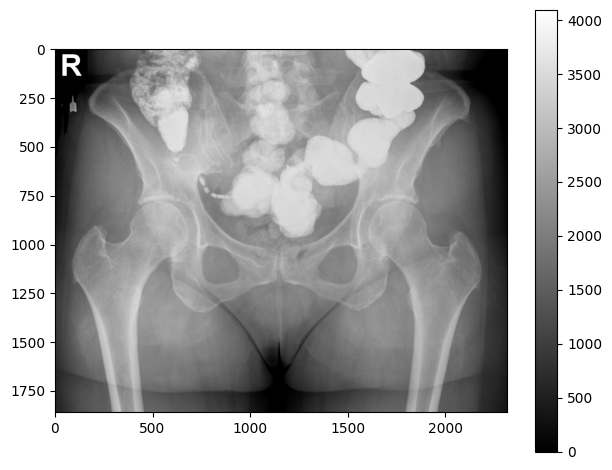

In [15]:
import pydicom as pd

# image_file_dicom = 'data/OAI-9000099-V06-20090728.dcm'
# image_file_dicom = 'data/OAI-9000296-V06-20080808.dcm'
# image_file_dicom = 'data/OAI-9000798-V06-20081107.dcm'
# image_file_dicom = 'data/OAI-9001695-V06-20081113.dcm'
image_file_dicom = 'data/OAI-9003175-V06-20090723.dcm'


img = pd.dcmread(image_file_dicom)
plt.imshow(img.pixel_array, cmap='gray')
plt.colorbar()
plt.tight_layout()
print(f"Image size: {img.pixel_array.shape}")
print(img)

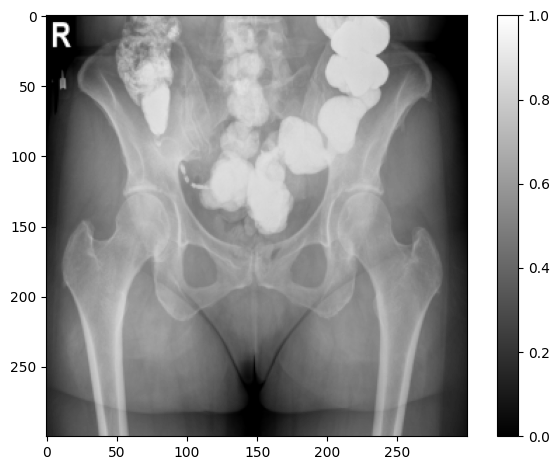

In [17]:
train_transforms = Compose([
    LoadImage(image_only=True, reader="PILReader"),
    EnsureChannelFirst(),
    Resize(spatial_size=(300, 300)),
    ScaleIntensity(),
    Rotate90(),
    Flip(spatial_axis=0),
    ToTensor(),
])

output = train_transforms(image_file_dicom)

plt.imshow(output[0], cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()

In [4]:
import torch

dataset = './data/'

data = torch.utils.data.DataLoader(dataset,
                            batch_size=3,
                            shuffle=True,
                            num_workers=2)

print(data)
print(list(data))

[['/', 'd', 'a'], ['.', '/', 'a'], ['t']]
